In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from REBA import compute_REBA

configs = {
    "font.size": 20,
    "font.family": "Times New Roman",
}

rcParams.update(configs)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [10]:
# load the resutls
model_name_list = ['MLP', 'CNN', 'GRU', 'LSTM', 'BiLSTM', 'Transformer', 'ST_Transformer']

for model_name in model_name_list:

    true_data = np.load(f'./test_results/{model_name}/y_data.npy')
    predict_data = np.load(f'./test_results/{model_name}/predict_data.npy')
    scalar = np.load(f'./test_results/{model_name}/scalar.npy')

    temp_true = true_data.reshape(-1, 75)
    temp_pred = predict_data.reshape(-1, 75)

    # compute the mae, rmse, mape
    mae = np.mean(np.abs(true_data - predict_data))
    rmse = np.sqrt(np.mean(np.square(true_data - predict_data)))
    mape = np.mean(np.abs((true_data - predict_data) / true_data))

    temp_true3 = true_data.reshape(-1, 25, 3)
    temp_pred3 = predict_data.reshape(-1, 25, 3)

    mpjpe = np.mean(np.sqrt(np.sum(np.square(temp_true3 - temp_pred3), axis=2)))

    print(f'Model Name: {model_name}\nMAE:{mae}, RMSE:{rmse}, MAPE:{mape}, MPJPE:{mpjpe}')


Model Name: MLP
MAE:0.16394290328025818, RMSE:0.2485945224761963, MAPE:1.4569531679153442, MPJPE:0.345414400100708
Model Name: CNN
MAE:0.11287613958120346, RMSE:0.20570263266563416, MAPE:0.8158831596374512, MPJPE:0.2377302497625351
Model Name: GRU
MAE:0.055378690361976624, RMSE:0.08508013188838959, MAPE:0.41820767521858215, MPJPE:0.11343097686767578
Model Name: LSTM
MAE:0.03958699852228165, RMSE:0.07559406757354736, MAPE:0.34869182109832764, MPJPE:0.08211522549390793
Model Name: BiLSTM
MAE:0.05753132700920105, RMSE:0.10226058214902878, MAPE:0.42723146080970764, MPJPE:0.11989106982946396
Model Name: Transformer
MAE:0.05345137044787407, RMSE:0.07679945230484009, MAPE:0.44627755880355835, MPJPE:0.10885497182607651
Model Name: ST_Transformer
MAE:0.01772584393620491, RMSE:0.03281250223517418, MAPE:0.13140815496444702, MPJPE:0.03595811873674393


In [11]:
model_name = 'ST_Transformer'

true_data = np.load(f'./test_results/{model_name}/y_data.npy')
predict_data = np.load(f'./test_results/{model_name}/predict_data.npy')
scalar = np.load(f'./test_results/{model_name}/scalar.npy')

print('true_data data shape:', true_data.shape, 'predict_data shape:', predict_data.shape)

true_data = true_data.reshape(-1, 75)
predict_data = predict_data.reshape(-1, 75)

# compute the REBA
true_reba_score = np.array(compute_REBA(predict_data)).reshape(-1, 6)
pre_reba_score = np.array(compute_REBA(true_data)).reshape(-1, 6)
reba_error = np.abs(true_reba_score - pre_reba_score)
# print('REBA error:', reba_error)

true_data data shape: (101, 6, 75) predict_data shape: (101, 6, 75)


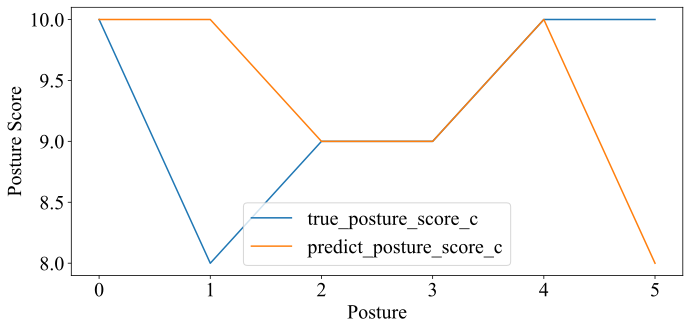

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

true_temp = true_reba_score[0]
predict_temp = pre_reba_score[0]

plt.plot(range(len(true_temp)), true_temp, label='true_posture_score_c')
plt.plot(range(len(predict_temp)), predict_temp, label='predict_posture_score_c')

plt.xlabel('Posture')
plt.ylabel('Posture Score')

plt.legend()
plt.tight_layout()
plt.show()